In [1]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

C:\Users\leoyo\AppData\Local\Temp\ipykernel_11500\2271974307.py:3: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train.csv')


In [2]:
train_data

,ID,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,...,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRAIN_000000,TRZKPL,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
1,TRAIN_000001,TRYBLT,만45-50세,NaN,IVF,ICSI,0,알 수 없음,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
2,TRAIN_000002,TRVNRY,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0
3,TRAIN_000003,TRJXFG,만35-37세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
4,TRAIN_000004,TRVNRY,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256346,TRAIN_256174,TRZKPL,만45-50세,NaN,DI,IUI,1,알 수 없음,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
256347,TRAIN_256222,TRYBLT,만18-34세,NaN,DI,IUI,1,알 수 없음,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
256348,TRAIN_256228,TRYBLT,만40-42세,NaN,DI,IUI,1,알 수 없음,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
256349,TRAIN_256301,TRCMWS,만40-42세,NaN,DI,IUI,0,알 수 없음,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
import pandas as pd

# 1. 시술 유형이 'IVF'인 행만 선택하여 train_ivf_data로 정의
train_ivf_data = train_data[train_data['시술 유형'] == 'IVF'].copy()

# 2. 시술 당시 나이 전처리
# "알 수 없음"인 행 제거
train_ivf_data = train_ivf_data[train_ivf_data['시술 당시 나이'] != '알 수 없음']

# 나이 매핑: 만18-34세 -> 0, 만35-37세 -> 1, ..., 만45-50세 -> 5
age_mapping = {
    "만18-34세": 0,
    "만35-37세": 1,
    "만38-39세": 2,
    "만40-42세": 3,
    "만43-44세": 4,
    "만45-50세": 5
}
train_ivf_data['시술 당시 나이'] = train_ivf_data['시술 당시 나이'].map(age_mapping)

# 3. 총 시술 횟수, IVF 시술 횟수, IVF 임신 횟수, IVF 출산 횟수 전처리
# 문자열 데이터를 숫자로 변환한 후, 6회 이상은 6으로 처리
count_cols = ["총 시술 횟수", "IVF 시술 횟수", "IVF 임신 횟수", "IVF 출산 횟수"]
for col in count_cols:
    # 문자열 데이터를 숫자로 변환 (변환 불가능한 값은 NaN으로)
    train_ivf_data[col] = pd.to_numeric(train_ivf_data[col], errors='coerce')
    # 6 이상이면 6으로 처리 (벡터화 연산 사용)
    train_ivf_data[col] = train_ivf_data[col].clip(upper=6)

# 4. 난자 출처 전처리: 본인 제공 -> 0, 기증 제공 -> 1
egg_mapping = {"본인 제공": 0, "기증 제공": 1}
train_ivf_data["난자 출처"] = train_ivf_data["난자 출처"].map(egg_mapping)

# 5. 정자 출처 전처리: 배우자 제공 -> 0, 기증 제공 -> 1
sperm_mapping = {"배우자 제공": 0, "기증 제공": 1}
train_ivf_data["정자 출처"] = train_ivf_data["정자 출처"].map(sperm_mapping)

In [7]:
train_ivf_data

,ID,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,...,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRAIN_000000,TRZKPL,0,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
1,TRAIN_000001,TRYBLT,5,NaN,IVF,ICSI,0,알 수 없음,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
2,TRAIN_000002,TRVNRY,0,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0
3,TRAIN_000003,TRJXFG,1,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
4,TRAIN_000004,TRVNRY,0,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250055,TRAIN_255781,TRCMWS,4,NaN,IVF,ICSI,0,알 수 없음,0.0,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,0.0,5.0,NaN,0
250056,TRAIN_255977,TRXQMD,1,NaN,IVF,Unknown,0,알 수 없음,0.0,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0
250057,TRAIN_256009,TRCMWS,5,NaN,IVF,IVF,0,알 수 없음,1.0,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,0.0,5.0,NaN,1
250058,TRAIN_256114,TRCMWS,3,NaN,IVF,Unknown,0,알 수 없음,0.0,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1


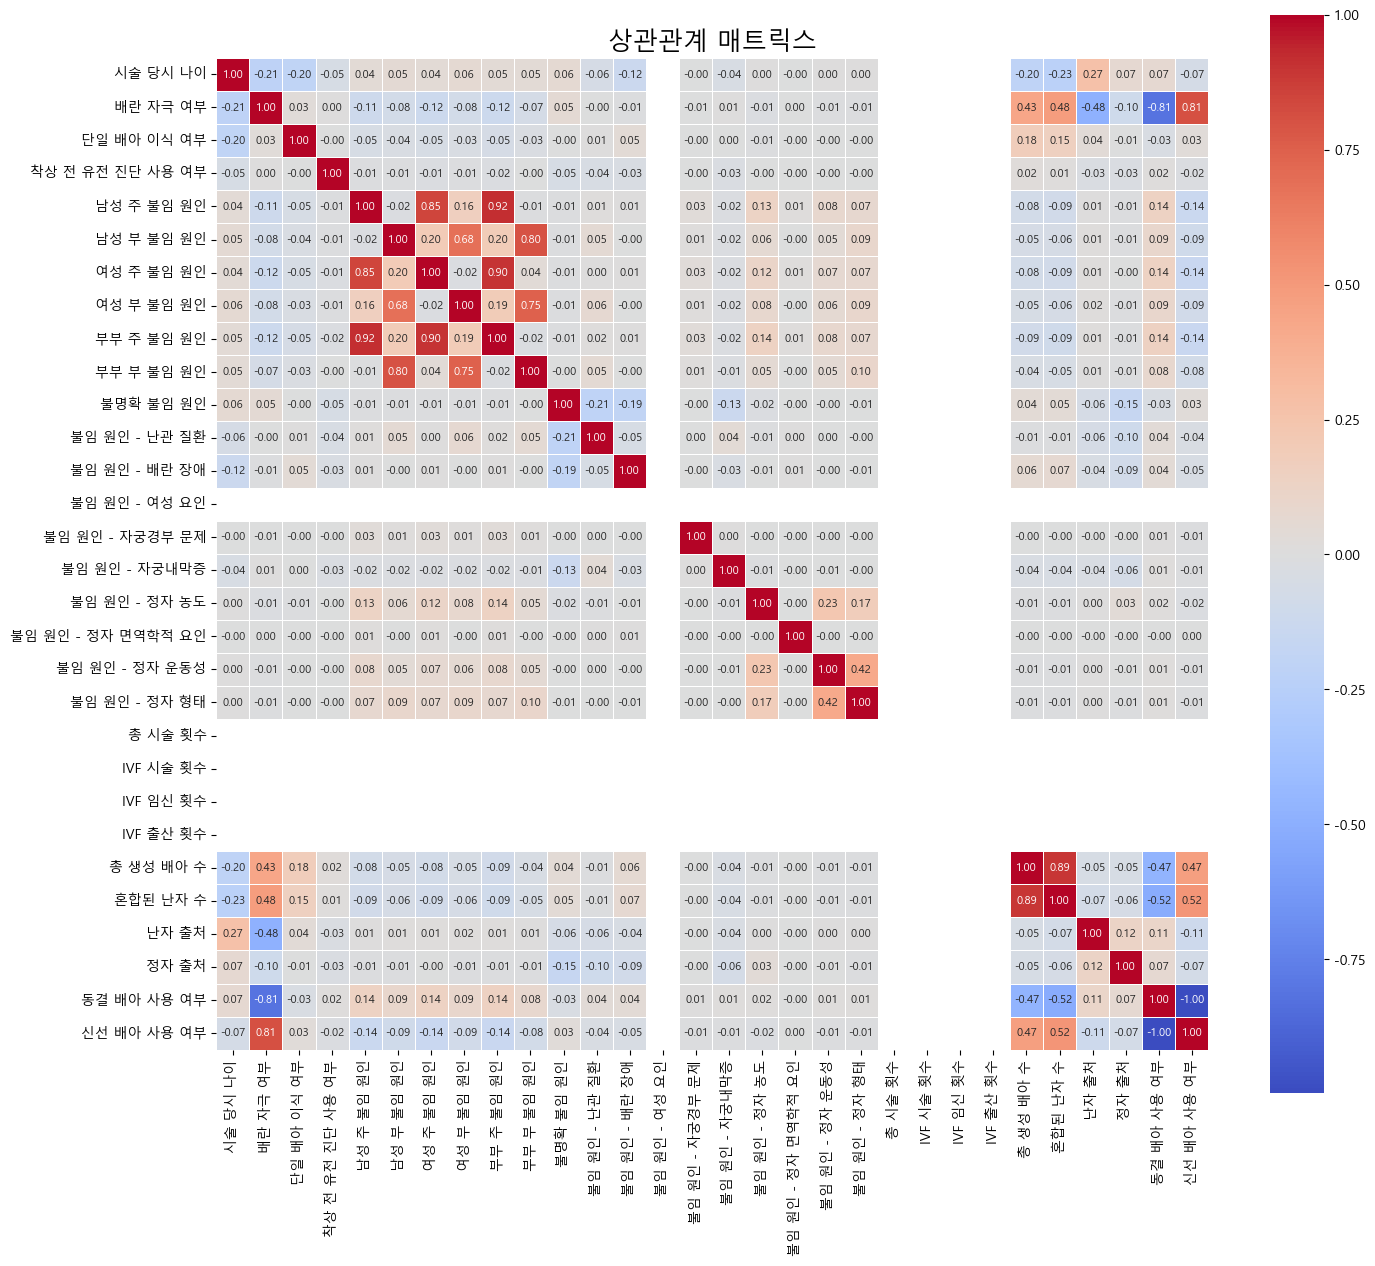

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# OS에 따라 한국어 폰트 설정 (Windows: Malgun Gothic, macOS: AppleGothic, 그 외: NanumGothic)
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 사용할 칼럼 리스트
cols = [
    "시술 당시 나이", "배란 자극 여부", "단일 배아 이식 여부", "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인", "남성 부 불임 원인", "여성 주 불임 원인", "여성 부 불임 원인",
    "부부 주 불임 원인", "부부 부 불임 원인", "불명확 불임 원인", "불임 원인 - 난관 질환",
    "불임 원인 - 배란 장애", "불임 원인 - 여성 요인", "불임 원인 - 자궁경부 문제",
    "불임 원인 - 자궁내막증", "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인",
    "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태", "총 시술 횟수", "IVF 시술 횟수",
    "IVF 임신 횟수", "IVF 출산 횟수", "총 생성 배아 수", "혼합된 난자 수", "난자 출처",
    "정자 출처", "동결 배아 사용 여부", "신선 배아 사용 여부"
]

# train_ivf_data에서 지정한 칼럼들만 선택
subset_data = train_ivf_data[cols].copy()

# 상관관계 행렬 계산 (숫자형 칼럼에 대해)
corr_matrix = subset_data.corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=.5, annot_kws={"size":8})
plt.title("상관관계 매트릭스", fontsize=18)
plt.show()

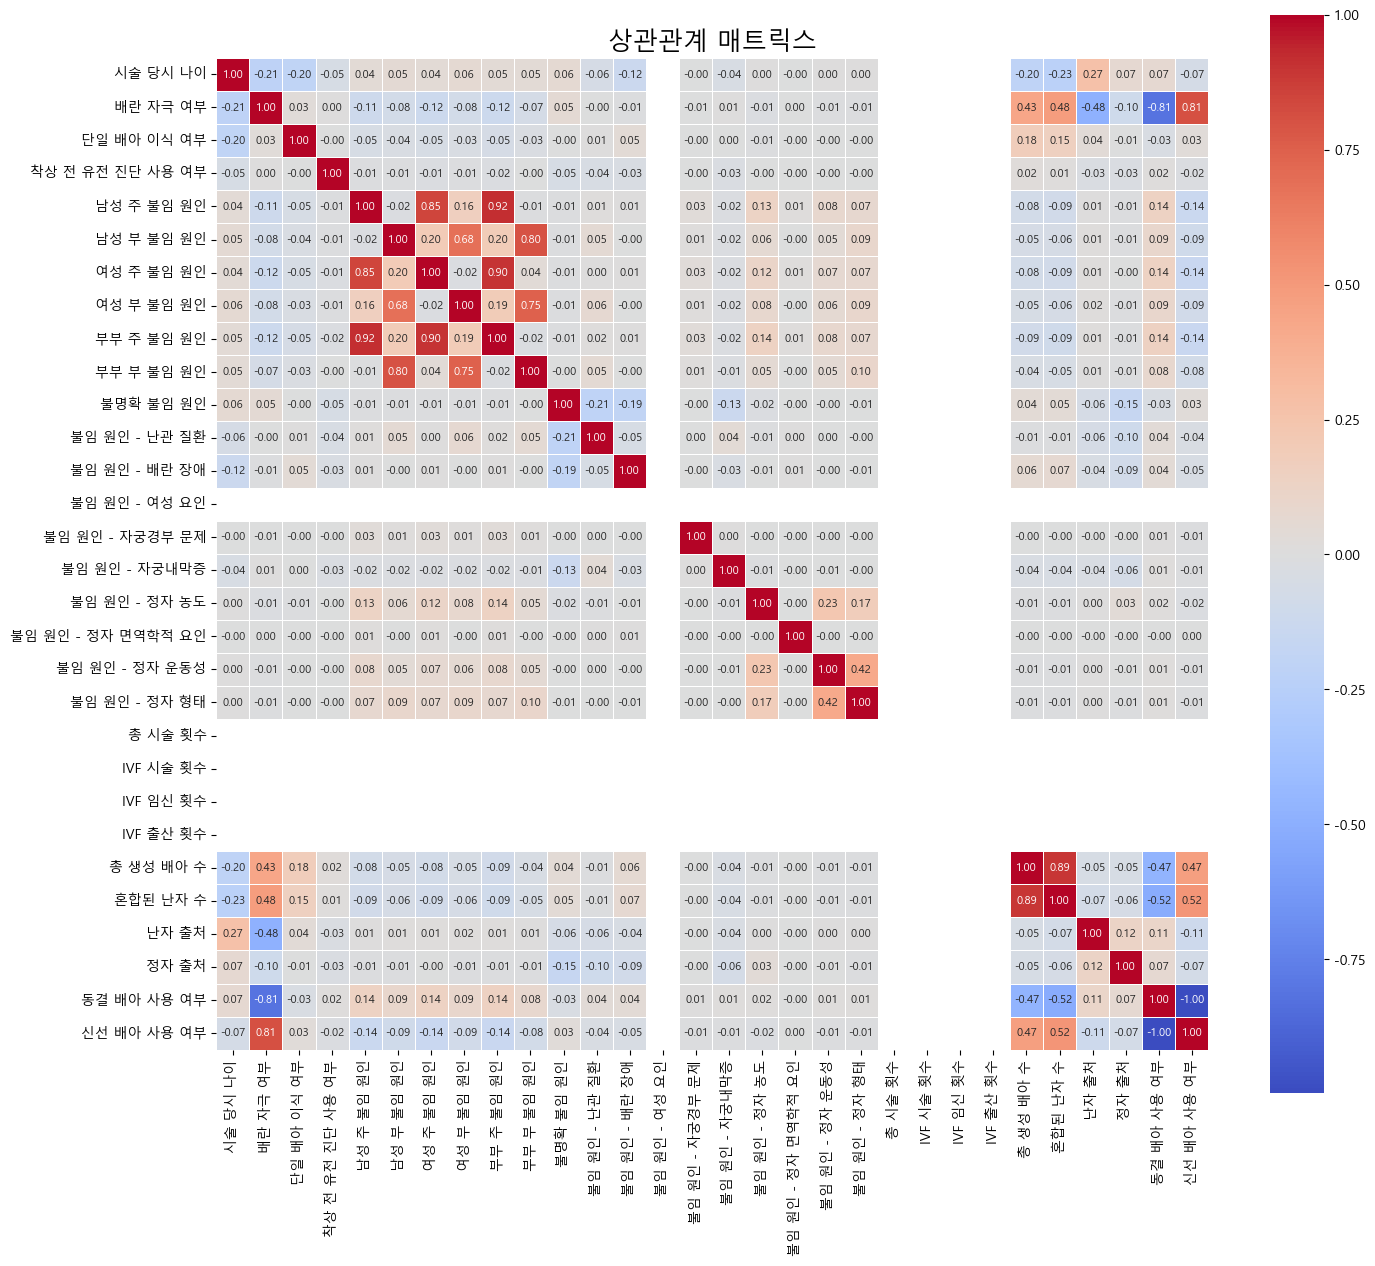

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# -------------------------
# 1. 데이터 전처리
# -------------------------

# 시술 유형이 'IVF'인 행만 선택하여 train_ivf_data로 정의
train_ivf_data = train_data[train_data['시술 유형'] == 'IVF'].copy()

# 시술 당시 나이 전처리: "알 수 없음"인 행 제거 및 나이 매핑
train_ivf_data = train_ivf_data[train_ivf_data['시술 당시 나이'] != '알 수 없음']
age_mapping = {
    "만18-34세": 0,
    "만35-37세": 1,
    "만38-39세": 2,
    "만40-42세": 3,
    "만43-44세": 4,
    "만45-50세": 5
}
train_ivf_data['시술 당시 나이'] = train_ivf_data['시술 당시 나이'].map(age_mapping)

# 총 시술 횟수, IVF 시술 횟수, IVF 임신 횟수, IVF 출산 횟수 전처리
# 문자열 데이터를 숫자로 변환한 후, 값이 6회 이상이면 6으로 처리 (0~5는 그대로 유지)
count_cols = ["총 시술 횟수", "IVF 시술 횟수", "IVF 임신 횟수", "IVF 출산 횟수"]
for col in count_cols:
    train_ivf_data[col] = pd.to_numeric(train_ivf_data[col], errors='coerce')
    train_ivf_data[col] = train_ivf_data[col].apply(lambda x: 6 if x >= 6 else x)

# 난자 출처 전처리: "본인 제공" -> 0, "기증 제공" -> 1
egg_mapping = {"본인 제공": 0, "기증 제공": 1}
train_ivf_data["난자 출처"] = train_ivf_data["난자 출처"].map(egg_mapping)

# 정자 출처 전처리: "배우자 제공" -> 0, "기증 제공" -> 1
sperm_mapping = {"배우자 제공": 0, "기증 제공": 1}
train_ivf_data["정자 출처"] = train_ivf_data["정자 출처"].map(sperm_mapping)

# -------------------------
# 2. 상관관계 매트릭스 시각화
# -------------------------

# OS에 따라 한국어 폰트 설정 (Windows: Malgun Gothic, macOS: AppleGothic, 그 외: NanumGothic)
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 사용할 칼럼 리스트
cols = [
    "시술 당시 나이", "배란 자극 여부", "단일 배아 이식 여부", "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인", "남성 부 불임 원인", "여성 주 불임 원인", "여성 부 불임 원인",
    "부부 주 불임 원인", "부부 부 불임 원인", "불명확 불임 원인", "불임 원인 - 난관 질환",
    "불임 원인 - 배란 장애", "불임 원인 - 여성 요인", "불임 원인 - 자궁경부 문제",
    "불임 원인 - 자궁내막증", "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인",
    "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태", "총 시술 횟수", "IVF 시술 횟수",
    "IVF 임신 횟수", "IVF 출산 횟수", "총 생성 배아 수", "혼합된 난자 수", "난자 출처",
    "정자 출처", "동결 배아 사용 여부", "신선 배아 사용 여부"
]

# train_ivf_data에서 지정한 칼럼들만 선택
subset_data = train_ivf_data[cols].copy()

# 상관관계 행렬 계산 (숫자형 칼럼 기준)
corr_matrix = subset_data.corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            linewidths=0.5, annot_kws={"size":8})
plt.title("상관관계 매트릭스", fontsize=18)
plt.show()

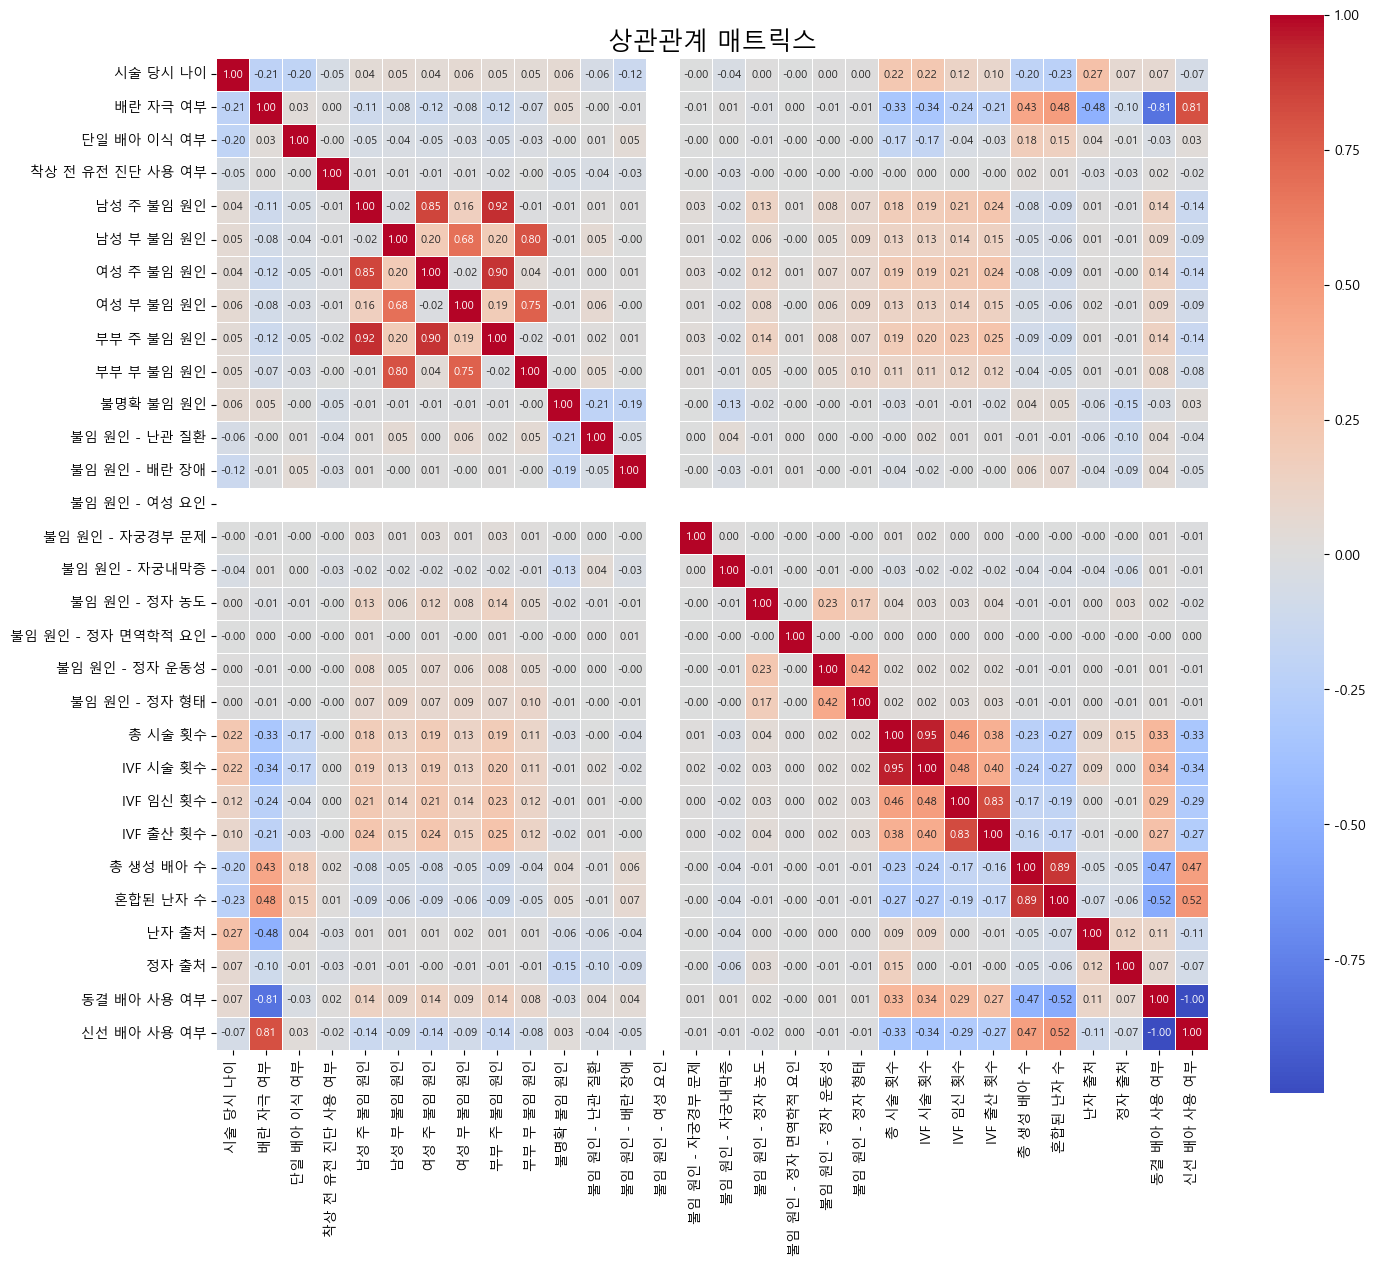

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# -------------------------
# 1. 데이터 전처리
# -------------------------

# 시술 유형이 'IVF'인 행만 선택하여 train_ivf_data로 정의
train_ivf_data = train_data[train_data['시술 유형'] == 'IVF'].copy()

# 시술 당시 나이 전처리: "알 수 없음"인 행 제거 및 나이 매핑
train_ivf_data = train_ivf_data[train_ivf_data['시술 당시 나이'] != '알 수 없음']
age_mapping = {
    "만18-34세": 0,
    "만35-37세": 1,
    "만38-39세": 2,
    "만40-42세": 3,
    "만43-44세": 4,
    "만45-50세": 5
}
train_ivf_data['시술 당시 나이'] = train_ivf_data['시술 당시 나이'].map(age_mapping)

# 총 시술 횟수, IVF 시술 횟수, IVF 임신 횟수, IVF 출산 횟수 전처리 (매핑)
# 예시: "0회" -> 0, "1회" -> 1, ..., "5회" -> 5, "6회 이상" -> 6
count_mapping = {
    "0회": 0,
    "1회": 1,
    "2회": 2,
    "3회": 3,
    "4회": 4,
    "5회": 5,
    "6회 이상": 6
}
count_cols = ["총 시술 횟수", "IVF 시술 횟수", "IVF 임신 횟수", "IVF 출산 횟수"]
for col in count_cols:
    train_ivf_data[col] = train_ivf_data[col].map(count_mapping)

# 난자 출처 전처리: "본인 제공" -> 0, "기증 제공" -> 1
egg_mapping = {"본인 제공": 0, "기증 제공": 1}
train_ivf_data["난자 출처"] = train_ivf_data["난자 출처"].map(egg_mapping)

# 정자 출처 전처리: "배우자 제공" -> 0, "기증 제공" -> 1
sperm_mapping = {"배우자 제공": 0, "기증 제공": 1}
train_ivf_data["정자 출처"] = train_ivf_data["정자 출처"].map(sperm_mapping)

# -------------------------
# 2. 상관관계 매트릭스 시각화
# -------------------------

# OS에 따라 한국어 폰트 설정 (Windows: Malgun Gothic, macOS: AppleGothic, 그 외: NanumGothic)
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 사용할 칼럼 리스트
cols = [
    "시술 당시 나이", "배란 자극 여부", "단일 배아 이식 여부", "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인", "남성 부 불임 원인", "여성 주 불임 원인", "여성 부 불임 원인",
    "부부 주 불임 원인", "부부 부 불임 원인", "불명확 불임 원인", "불임 원인 - 난관 질환",
    "불임 원인 - 배란 장애", "불임 원인 - 여성 요인", "불임 원인 - 자궁경부 문제",
    "불임 원인 - 자궁내막증", "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인",
    "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태", "총 시술 횟수", "IVF 시술 횟수",
    "IVF 임신 횟수", "IVF 출산 횟수", "총 생성 배아 수", "혼합된 난자 수", "난자 출처",
    "정자 출처", "동결 배아 사용 여부", "신선 배아 사용 여부"
]

# train_ivf_data에서 지정한 칼럼들만 선택
subset_data = train_ivf_data[cols].copy()

# 상관관계 행렬 계산 (숫자형 칼럼 기준)
corr_matrix = subset_data.corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            linewidths=0.5, annot_kws={"size":8})
plt.title("상관관계 매트릭스", fontsize=18)
plt.show()

삭제된 피처: ['여성 주 불임 원인', '부부 주 불임 원인', '부부 부 불임 원인', 'IVF 시술 횟수', 'IVF 출산 횟수', '혼합된 난자 수', '동결 배아 사용 여부', '신선 배아 사용 여부']


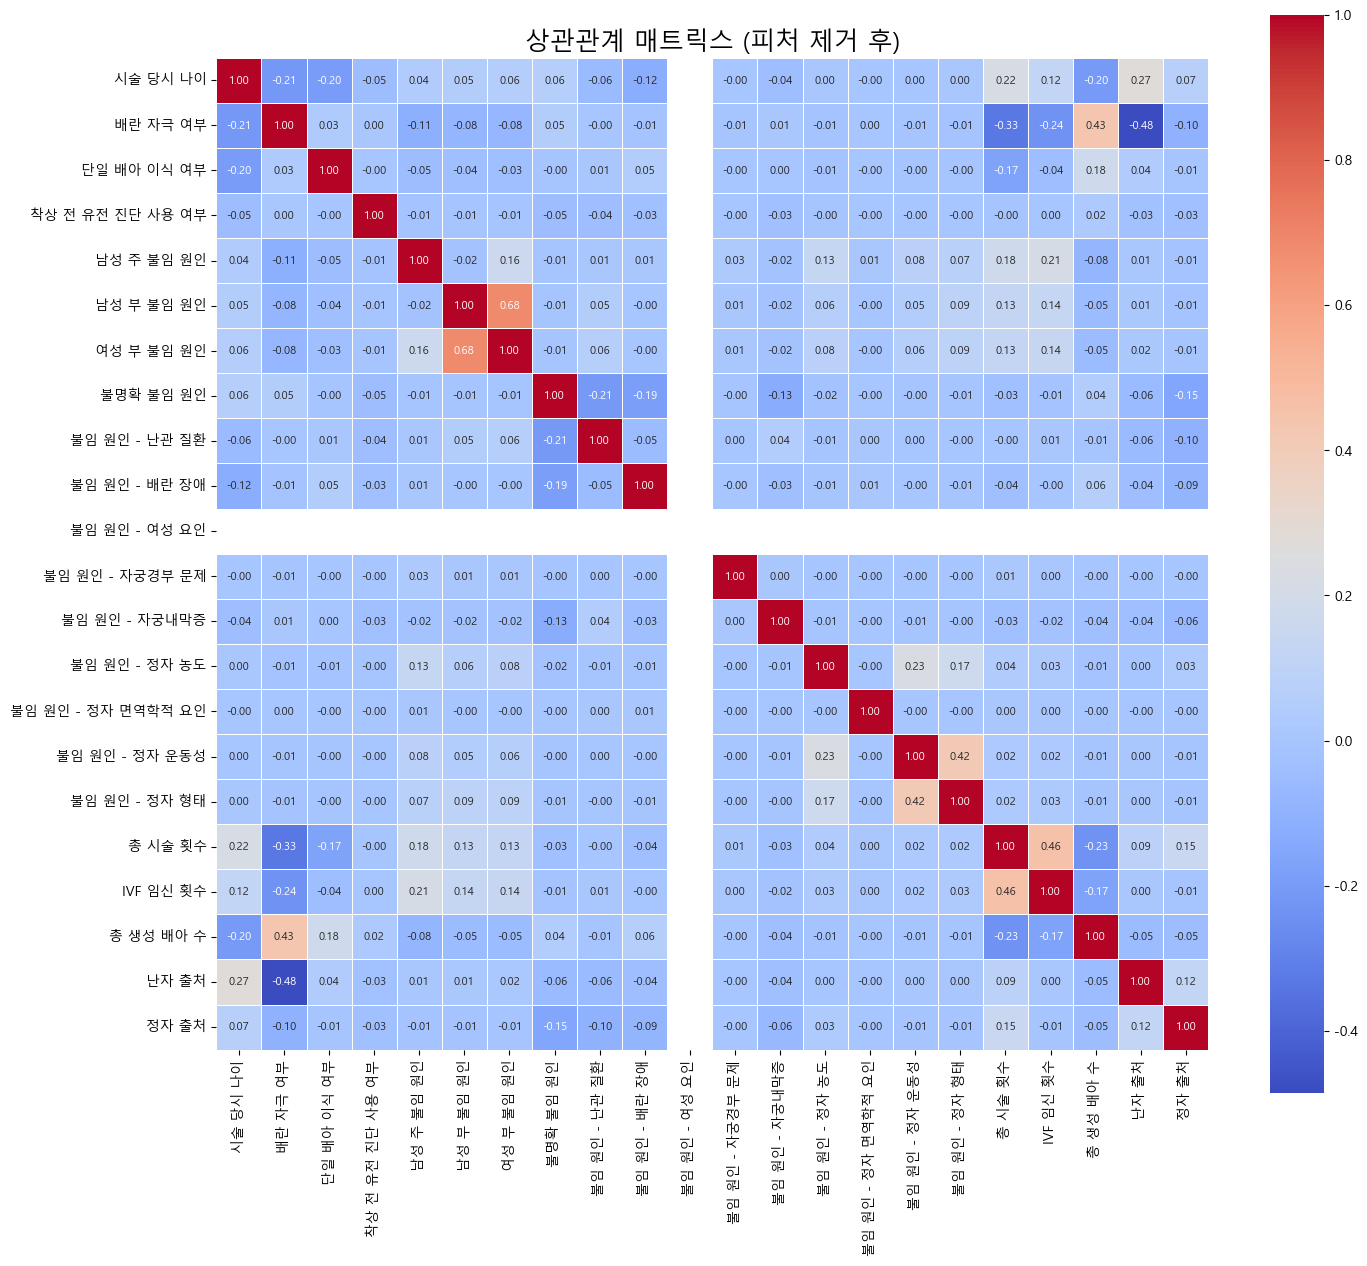

In [25]:
import numpy as np

# 기존 상관관계 행렬 계산 (숫자형 칼럼 기준)
corr_matrix = subset_data.corr()

# 상관관계 절대값을 이용하여 상위 삼각행렬 생성 (자기 자신은 제외)
threshold = 0.79
corr_matrix_abs = corr_matrix.abs()
upper_triangle = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(bool))

# 상관관계가 threshold 이상인 피처 목록을 확인 (즉, 높은 상관관계를 가진 피처들을 제거 대상에 추가)
to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] >= threshold)]

# 제거된 피처 목록 출력
print("삭제된 피처:", to_drop)

# 제거된 피처를 제외한 데이터셋 생성
subset_data_reduced = subset_data.drop(columns=to_drop)

# 새로운 상관관계 행렬 계산
new_corr_matrix = subset_data_reduced.corr()

# 새로운 상관관계 히트맵 시각화
plt.figure(figsize=(16, 14))
sns.heatmap(new_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            linewidths=0.5, annot_kws={"size":8})
plt.title("상관관계 매트릭스 (피처 제거 후)", fontsize=18)
plt.show()


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# =======================================================
# 0. (사전 전처리) - 이미 진행된 전처리 코드가 있다고 가정합니다.
#     - '시술 유형'이 'IVF'인 데이터만 사용
#     - '시술 당시 나이'는 "알 수 없음" 제거 후 age_mapping 진행
#     - 난자/정자 출처 매핑 진행
#     - 아래의 count 칼럼은 "0회", "1회", ..., "5회", "6회 이상" 문자열을 숫자로 매핑
#
# 예시 매핑 코드 (이미 수행되었다고 가정):
# -------------------------------------------------------
# count_mapping = {
#     "0회": 0,
#     "1회": 1,
#     "2회": 2,
#     "3회": 3,
#     "4회": 4,
#     "5회": 5,
#     "6회 이상": 6
# }
# count_cols = ["총 시술 횟수", "IVF 시술 횟수", "IVF 임신 횟수", "IVF 출산 횟수"]
# for col in count_cols:
#     train_ivf_data[col] = train_ivf_data[col].map(count_mapping)
# -------------------------------------------------------
# =======================================================

# =======================================================
# 1. 모델에 사용할 피처와 타겟 정의
# =======================================================

# 제공된 칼럼 목록 (불임 원인 - 여성 요인은 입력에서 제외)
cols = [
    "시술 당시 나이", "배란 자극 여부", "단일 배아 이식 여부", "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인", "남성 부 불임 원인", "여성 주 불임 원인", "여성 부 불임 원인",
    "부부 주 불임 원인", "부부 부 불임 원인", "불명확 불임 원인", "불임 원인 - 난관 질환",
    "불임 원인 - 배란 장애", "불임 원인 - 여성 요인",  # <-- 여기서 제외할 예정
    "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증", "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태",
    "총 시술 횟수", "IVF 시술 횟수", "IVF 임신 횟수", "IVF 출산 횟수",
    "총 생성 배아 수", "혼합된 난자 수", "난자 출처", "정자 출처",
    "동결 배아 사용 여부", "신선 배아 사용 여부"
]

# 모델 입력 피처는 "불임 원인 - 여성 요인"을 제외한 나머지
input_features = [col for col in cols if col != "불임 원인 - 여성 요인"]

# 타겟: '임신 성공 여부' (데이터셋에 해당 칼럼이 존재한다고 가정)
X = train_ivf_data[input_features].copy()
y = train_ivf_data["임신 성공 여부"].copy()

# =======================================================
# 2. 데이터 분할 및 언더샘플링 (클래스 불균형 보완)
# =======================================================

# train:validation = 7:3 (stratify 옵션으로 클래스 비율 유지)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 언더샘플링: 임신 성공(1)인 소수 클래스는 그대로 두고,
# 다수 클래스(0)를 소수 클래스의 수와 동일하게 다운샘플링합니다.
X_train_majority = X_train[y_train == 0]
y_train_majority = y_train[y_train == 0]
X_train_minority = X_train[y_train == 1]
y_train_minority = y_train[y_train == 1]

# 다수 클래스에서 소수 클래스 개수만큼 무작위 샘플링 (replace=False)
X_train_majority_downsampled, y_train_majority_downsampled = resample(
    X_train_majority,
    y_train_majority,
    replace=False,
    n_samples=len(y_train_minority),
    random_state=42
)

# 다운샘플링한 다수 클래스와 소수 클래스를 결합
X_train_balanced = pd.concat([X_train_majority_downsampled, X_train_minority])
y_train_balanced = pd.concat([y_train_majority_downsampled, y_train_minority])

# 데이터를 섞어줍니다.
train_balanced = X_train_balanced.copy()
train_balanced["임신 성공 여부"] = y_train_balanced
train_balanced = train_balanced.sample(frac=1, random_state=42)
X_train_balanced = train_balanced[input_features]
y_train_balanced = train_balanced["임신 성공 여부"]

# =======================================================
# 3. 딥러닝 모델 구성 (Keras)
# =======================================================

model = Sequential()

# Input Layer - 입력 차원 = input_features 개수, activation = ReLU
model.add(Dense(32, activation='relu', input_dim=len(input_features)))
# Dense Layer - 32 Units, ReLU (위에서 이미 사용됨)
# Dense Layer - 64 Units, ReLU
model.add(Dense(64, activation='relu'))
# Dropout Layer - 10%
model.add(Dropout(0.1))
# Dense Layer - 128 units, ReLU
model.add(Dense(128, activation='relu'))
# Dense Layer - 256 units, ReLU
model.add(Dense(256, activation='relu'))
# Batch Normalization
model.add(BatchNormalization())
# Dense Layer - 512 Units, ReLU
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
# Dropout Layer - 20%
model.add(Dropout(0.2))
# Dense Layer - 256 units, ReLU
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation='relu'))
# Dense Layer - 128 units, ReLU
model.add(Dense(128, activation='relu'))
# Dropout Layer - 10%
model.add(Dropout(0.1))
# Dense Layer - 64 units, ReLU
model.add(Dense(64, activation='relu'))
# Dense Layer - 32 units, ReLU
model.add(Dense(32, activation='relu'))
# Output Layer - 1 unit, Sigmoid
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일 (optimizer: adam, loss: binary_crossentropy)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping 콜백 (validation 기준, patience=5, 최적 모델 복원)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# =======================================================
# 4. 모델 학습
# =======================================================

history = model.fit(
    X_train_balanced, y_train_balanced,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=50,
    callbacks=[early_stopping]
)

# =======================================================
# 5. 모델 평가 및 지표 출력
# =======================================================

# Validation set에 대해 예측 (확률)
y_val_pred_prob = model.predict(X_val)
# 0.5 threshold를 적용하여 이진 분류 결과 도출
y_val_pred = (y_val_pred_prob > 0.5).astype(int)

# 각 평가 지표 계산
acc = accuracy_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
rocauc = roc_auc_score(y_val, y_val_pred_prob)

print("Accuracy: {:.4f}".format(acc))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("ROC AUC Score: {:.4f}".format(rocauc))

C:\Users\leoyo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 59s 67ms/step - accuracy: 0.5060 - loss: 0.6922 - val_accuracy: 0.2619 - val_loss: 0.6936
Epoch 2/50


KeyboardInterrupt: 

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, RandomForestClassifier

# ----------------------------------------------------------
# 0. 데이터 전처리는 이미 완료되었다고 가정합니다.
#     예: '시술 유형'이 'IVF'인 데이터 선택, 나이 매핑, 난자/정자 출처 매핑,
#         "0회", "1회", ... "6회 이상" 매핑 등.
#
#     그리고 X와 y는 아래와 같이 정의되어 있다고 가정합니다.
# ----------------------------------------------------------

# 예시 피처 목록 (불임 원인 - 여성 요인은 입력에서 제외)
cols = [
    "시술 당시 나이", "배란 자극 여부", "단일 배아 이식 여부", "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인", "남성 부 불임 원인", "여성 주 불임 원인", "여성 부 불임 원인",
    "부부 주 불임 원인", "부부 부 불임 원인", "불명확 불임 원인", "불임 원인 - 난관 질환",
    "불임 원인 - 배란 장애", "불임 원인 - 여성 요인",  # --> 여기서 제외
    "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증", "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태",
    "총 시술 횟수", "IVF 시술 횟수", "IVF 임신 횟수", "IVF 출산 횟수",
    "총 생성 배아 수", "혼합된 난자 수", "난자 출처", "정자 출처",
    "동결 배아 사용 여부", "신선 배아 사용 여부"
]

# 모델 입력 피처는 "불임 원인 - 여성 요인"을 제외한 나머지
input_features = [col for col in cols if col != "불임 원인 - 여성 요인"]

# 타겟: '임신 성공 여부' (데이터셋에 해당 칼럼이 존재한다고 가정)
X = train_ivf_data[input_features].copy()
y = train_ivf_data["임신 성공 여부"].copy()

# ----------------------------------------------------------
# 1. 결측치가 있는 행 제거
# ----------------------------------------------------------
X = X.dropna()        # X에서 결측치 있는 행 삭제
y = y.loc[X.index]     # X와 인덱스 맞추기

# ----------------------------------------------------------
# 2. 데이터 분할 (train:validation = 70:30, stratify 적용)
# ----------------------------------------------------------
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# ----------------------------------------------------------
# 3. 언더샘플링: training 데이터에서 다수 클래스(0)를 소수 클래스(1)와 동일한 수로 다운샘플링
# ----------------------------------------------------------
X_train_majority = X_train[y_train == 0]
y_train_majority = y_train[y_train == 0]
X_train_minority = X_train[y_train == 1]
y_train_minority = y_train[y_train == 1]

X_train_majority_downsampled, y_train_majority_downsampled = resample(
    X_train_majority,
    y_train_majority,
    replace=False,
    n_samples=len(y_train_minority),
    random_state=42
)

X_train_balanced = pd.concat([X_train_majority_downsampled, X_train_minority])
y_train_balanced = pd.concat([y_train_majority_downsampled, y_train_minority])

# 섞어줍니다.
train_balanced = X_train_balanced.copy()
train_balanced["임신 성공 여부"] = y_train_balanced
train_balanced = train_balanced.sample(frac=1, random_state=42)
X_train_balanced = train_balanced[input_features]
y_train_balanced = train_balanced["임신 성공 여부"]

# ----------------------------------------------------------
# 4. 각 모델에 대해 파이프라인 구성 (StandardScaler 적용)
# ----------------------------------------------------------

# KNN: n_neighbors=5, n_jobs=-1
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=-1))
])

# Decision Tree: max_depth=10
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42))
])

# AdaBoost: estimator로 max_depth=2인 DecisionTree, n_estimators=50
ada_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ada', AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
        n_estimators=50,
        random_state=42))
])

# RandomForest: n_estimators=100, max_depth=10, n_jobs=-1
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1))
])

# Voting Classifier: Hard & Soft voting (개별 모델은 동일 파라미터 사용)
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=-1)),
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('ada', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
                                 n_estimators=50, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1))
]

voting_hard_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('voting', VotingClassifier(estimators=estimators, voting='hard', n_jobs=-1))
])

voting_soft_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('voting', VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1))
])

# ----------------------------------------------------------
# 5. 각 모델 학습 및 평가
# ----------------------------------------------------------
models = {
    'KNN': knn_pipeline,
    'Decision Tree': dt_pipeline,
    'AdaBoost': ada_pipeline,
    'Random Forest': rf_pipeline,
    'Voting Hard': voting_hard_pipeline,
    'Voting Soft': voting_soft_pipeline
}

for name, model in models.items():
    print(f"Training model: {name}")
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_val)
    
    # predict_proba 지원 시 확률 예측
    try:
        y_pred_prob = model.predict_proba(X_val)[:, 1]
    except Exception:
        y_pred_prob = None

    acc = accuracy_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    rocauc = roc_auc_score(y_val, y_pred_prob) if y_pred_prob is not None else np.nan

    print(f"{name} -> Accuracy: {acc:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, ROC AUC: {rocauc:.4f}")
    print("-" * 50)

Training model: KNN
KNN -> Accuracy: 0.5684, Recall: 0.5986, F1: 0.4209, ROC AUC: 0.6079
--------------------------------------------------
Training model: Decision Tree
Decision Tree -> Accuracy: 0.5784, Recall: 0.7217, F1: 0.4729, ROC AUC: 0.6683
--------------------------------------------------
Training model: AdaBoost


C:\Users\leoyo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost -> Accuracy: 0.5763, Recall: 0.7344, F1: 0.4760, ROC AUC: 0.6765
--------------------------------------------------
Training model: Random Forest
Random Forest -> Accuracy: 0.5852, Recall: 0.7151, F1: 0.4746, ROC AUC: 0.6763
--------------------------------------------------
Training model: Voting Hard
Voting Hard -> Accuracy: 0.5954, Recall: 0.6918, F1: 0.4726, ROC AUC: nan
--------------------------------------------------
Training model: Voting Soft
Voting Soft -> Accuracy: 0.5759, Recall: 0.6947, F1: 0.4619, ROC AUC: 0.6577
--------------------------------------------------


In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

# ----------------------------------------------------------
# 0. 데이터 전처리는 이미 완료되었다고 가정합니다.
#     예: '시술 유형'이 'IVF'인 데이터 선택, 나이 매핑, 난자/정자 출처 매핑,
#         "0회", "1회", ... "6회 이상" 매핑 등.
#
#     X와 y는 아래와 같이 정의되어 있다고 가정합니다.
# ----------------------------------------------------------

# 예시 피처 목록 (불임 원인 - 여성 요인은 입력에서 제외)
cols = [
    "시술 당시 나이", "배란 자극 여부", "단일 배아 이식 여부", "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인", "남성 부 불임 원인", "여성 주 불임 원인", "여성 부 불임 원인",
    "부부 주 불임 원인", "부부 부 불임 원인", "불명확 불임 원인", "불임 원인 - 난관 질환",
    "불임 원인 - 배란 장애", "불임 원인 - 여성 요인",  # --> 여기서 제외
    "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증", "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태",
    "총 시술 횟수", "IVF 시술 횟수", "IVF 임신 횟수", "IVF 출산 횟수",
    "총 생성 배아 수", "혼합된 난자 수", "난자 출처", "정자 출처",
    "동결 배아 사용 여부", "신선 배아 사용 여부"
]

# 입력 피처는 "불임 원인 - 여성 요인" 제외
input_features = [col for col in cols if col != "불임 원인 - 여성 요인"]

# 타겟: '임신 성공 여부' (이미 전처리되었다고 가정)
X = train_ivf_data[input_features].copy()
y = train_ivf_data["임신 성공 여부"].copy()

# ----------------------------------------------------------
# [선택사항] X에 결측치가 있다면 제거 (또는 Imputer 적용)
# ----------------------------------------------------------
X = X.dropna()
y = y.loc[X.index]

# ----------------------------------------------------------
# 1. 데이터 분할 (train:validation = 70:30, stratify 적용)
# ----------------------------------------------------------
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# ----------------------------------------------------------
# 2. 각 모델에 대해 파이프라인 구성 (StandardScaler 적용)
# ----------------------------------------------------------

# KNN: n_neighbors=5, n_jobs=-1
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=-1))
])

# Decision Tree: max_depth=10
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42))
])

# AdaBoost: estimator로 max_depth=2인 DecisionTree, n_estimators=50
ada_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ada', AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
        n_estimators=50,
        random_state=42))
])

# RandomForest: n_estimators=100, max_depth=10, n_jobs=-1
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1))
])

# Voting Classifier: Hard Voting
voting_hard_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('voting', VotingClassifier(
        estimators=[
            ('knn', KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=-1)),
            ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
            ('ada', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
                                         n_estimators=50, random_state=42)),
            ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1))
        ],
        voting='hard', n_jobs=-1))
])

# Voting Classifier: Soft Voting
voting_soft_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('voting', VotingClassifier(
        estimators=[
            ('knn', KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=-1)),
            ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
            ('ada', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
                                         n_estimators=50, random_state=42)),
            ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1))
        ],
        voting='soft', n_jobs=-1))
])

# ----------------------------------------------------------
# 3. Ensemble: StackingClassifier 구성
# ----------------------------------------------------------
# base_estimator로 위의 6 모델(파이프라인)을 사용하고, 최종 메타 모델로 LogisticRegression 사용
estimators = [
    ('knn', knn_pipeline),
    ('dt', dt_pipeline),
    ('ada', ada_pipeline),
    ('rf', rf_pipeline),
    ('vhard', voting_hard_pipeline),
    ('vsoft', voting_soft_pipeline)
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1,
    passthrough=False
)

# ----------------------------------------------------------
# 4. 학습 및 평가
# ----------------------------------------------------------
stacking_clf.fit(X_train, y_train)

# 예측
y_pred = stacking_clf.predict(X_val)
try:
    y_pred_prob = stacking_clf.predict_proba(X_val)[:, 1]
except Exception:
    y_pred_prob = None

# 평가 지표 계산
acc = accuracy_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
rocauc = roc_auc_score(y_val, y_pred_prob) if y_pred_prob is not None else np.nan

print("Stacking Ensemble -> Accuracy: {:.4f}, Recall: {:.4f}, F1: {:.4f}, ROC AUC: {:.4f}"
      .format(acc, recall, f1, rocauc))

Stacking Ensemble -> Accuracy: 0.7372, Recall: 0.0272, F1: 0.0514, ROC AUC: 0.6777


In [61]:
import pandas as pd
import numpy as np

# ---------------------------
# 0. 전처리에 필요한 매핑 사전 (train과 동일)
# ---------------------------
age_mapping = {
    "만18-34세": 0,
    "만35-37세": 1,
    "만38-39세": 2,
    "만40-42세": 3,
    "만43-44세": 4,
    "만45-50세": 5,
    "알 수 없음": 3
}

count_mapping = {
    "0회": 0,
    "1회": 1,
    "2회": 2,
    "3회": 3,
    "4회": 4,
    "5회": 5,
    "6회 이상": 6
}

egg_mapping = {"본인 제공": 0, "기증 제공": 1}
sperm_mapping = {"배우자 제공": 0, "기증 제공": 1}

# ---------------------------
# 1. 사용할 피처 목록 (불임 원인 - 여성 요인은 입력에서 제외)
# ---------------------------
cols = [
    "시술 당시 나이", "배란 자극 여부", "단일 배아 이식 여부", "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인", "남성 부 불임 원인", "여성 주 불임 원인", "여성 부 불임 원인",
    "부부 주 불임 원인", "부부 부 불임 원인", "불명확 불임 원인", "불임 원인 - 난관 질환",
    "불임 원인 - 배란 장애", "불임 원인 - 여성 요인",  # --> 여기서 제외됨
    "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증", "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태",
    "총 시술 횟수", "IVF 시술 횟수", "IVF 임신 횟수", "IVF 출산 횟수",
    "총 생성 배아 수", "혼합된 난자 수", "난자 출처", "정자 출처",
    "동결 배아 사용 여부", "신선 배아 사용 여부"
]

# 모델 입력 피처는 "불임 원인 - 여성 요인"을 제외한 나머지
input_features = [col for col in cols if col != "불임 원인 - 여성 요인"]

# ---------------------------
# 2. test.csv 파일 로드 및 전처리 (train과 동일하게)
# ---------------------------
test_df = pd.read_csv("test.csv")

# (A) 결측치 제거 대신, 모델 입력 피처에 대해 null은 0으로 채우도록 진행 (단, "시술 당시 나이"는 "알 수 없음" 제거 후 매핑)
# 우선, input_features에 해당하는 열이 모두 존재하는지 확인한 후, 결측치는 채워줍니다.
for feature in input_features:
    if feature in test_df.columns:
        test_df[feature] = test_df[feature].fillna(0)

# (B) "시술 당시 나이" 전처리: "알 수 없음"인 행은 제거한 후, 매핑 적용
#test_df = test_df[test_df["시술 당시 나이"] != "알 수 없음"].copy()
test_df["시술 당시 나이"] = test_df["시술 당시 나이"].map(age_mapping)

# (C) 카운트 칼럼 매핑: "총 시술 횟수", "IVF 시술 횟수", "IVF 임신 횟수", "IVF 출산 횟수"
for col in ["총 시술 횟수", "IVF 시술 횟수", "IVF 임신 횟수", "IVF 출산 횟수"]:
    if col in test_df.columns:
        test_df[col] = test_df[col].map(count_mapping)

# (D) 난자 및 정자 출처 매핑
if "난자 출처" in test_df.columns:
    test_df["난자 출처"] = test_df["난자 출처"].map(egg_mapping)
if "정자 출처" in test_df.columns:
    test_df["정자 출처"] = test_df["정자 출처"].map(sperm_mapping)

# ---------------------------
# 3. 임신 성공 여부 예측
# ---------------------------
# test_df에 예측 결과를 저장할 새 열을 생성
test_df["임신 성공 여부"] = np.nan

# (A) 시술 유형이 "IVF"인 행에 대해: 학습된 모델로 예측
ivf_idx = test_df["시술 유형"] == "IVF"
if ivf_idx.sum() > 0:
    # 모델 입력 피처 선택 (train 시와 동일)
    X_test_ivf = test_df.loc[ivf_idx, input_features].copy()
    
    # 만약 X_test_ivf에 여전히 결측치가 있다면 0으로 채움
    X_test_ivf = X_test_ivf.fillna(0)
    
    # 이미 학습된 모델(예: stacking_clf)을 사용하여 예측 (파이프라인 내에 StandardScaler 포함)
    preds_ivf = stacking_clf.predict(X_test_ivf)
    test_df.loc[ivf_idx, "임신 성공 여부"] = preds_ivf

# (B) 시술 유형이 "di"인 행에 대해: 임신 성공 여부를 0으로 할당
di_idx = test_df["시술 유형"] == "di"
if di_idx.sum() > 0:
    test_df.loc[di_idx, "임신 성공 여부"] = 0

# (C) 만약 다른 시술 유형이 있다면, 여기서는 모두 0으로 할당
other_idx = ~test_df["시술 유형"].isin(["IVF", "di"])
if other_idx.sum() > 0:
    test_df.loc[other_idx, "임신 성공 여부"] = 0

# ---------------------------
# 4. 결과 저장
# ---------------------------
# 예측 결과가 채워진 test_df를 CSV 파일로 저장
test_df.to_csv("test_with_predictions.csv", index=False, encoding = 'cp949')

print("예측이 완료되어 'test_with_predictions.csv' 파일로 저장되었습니다.")

예측이 완료되어 'test_with_predictions.csv' 파일로 저장되었습니다.


In [55]:
# 예측 결과가 채워진 test_df를 CSV 파일로 저장
test_df.to_csv("test_with_predictions.csv", index=False, encoding = 'cp949')

print("예측이 완료되어 'test_with_predictions.csv' 파일로 저장되었습니다.")

예측이 완료되어 'test_with_predictions.csv' 파일로 저장되었습니다.


In [49]:
# 각 열별 결측치 개수 출력
print("각 열별 결측치 개수:")
print(X_test_ivf.isnull().sum())

# 결측치가 있는 행들 출력
print("\n결측치가 있는 행들:")
print(X_test_ivf[X_test_ivf.isnull().any(axis=1)])

각 열별 결측치 개수:
시술 당시 나이               0
배란 자극 여부               0
단일 배아 이식 여부            0
착상 전 유전 진단 사용 여부       0
남성 주 불임 원인             0
남성 부 불임 원인             0
여성 주 불임 원인             0
여성 부 불임 원인             0
부부 주 불임 원인             0
부부 부 불임 원인             0
불명확 불임 원인              0
불임 원인 - 난관 질환          0
불임 원인 - 배란 장애          0
불임 원인 - 자궁경부 문제        0
불임 원인 - 자궁내막증          0
불임 원인 - 정자 농도          0
불임 원인 - 정자 면역학적 요인     0
불임 원인 - 정자 운동성         0
불임 원인 - 정자 형태          0
총 시술 횟수                0
IVF 시술 횟수              0
IVF 임신 횟수              0
IVF 출산 횟수              0
총 생성 배아 수              0
혼합된 난자 수               0
난자 출처                  0
정자 출처                 38
동결 배아 사용 여부            0
신선 배아 사용 여부            0
dtype: int64

결측치가 있는 행들:
       시술 당시 나이  배란 자극 여부  단일 배아 이식 여부  착상 전 유전 진단 사용 여부  남성 주 불임 원인  \
527           0         1          0.0               0.0           0   
3430          3         1          0.0               0.0           0   
3479          4     

In [17]:
np.__version__

'1.26.4'

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler  # 추가
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# =======================================================
# 0. (사전 전처리) - 이미 진행된 전처리 코드가 있다고 가정합니다.
#     - '시술 유형'이 'IVF'인 데이터만 사용
#     - '시술 당시 나이'는 "알 수 없음" 제거 후 age_mapping 진행
#     - 난자/정자 출처 매핑 진행
#     - 아래의 count 칼럼은 "0회", "1회", ..., "5회", "6회 이상" 문자열을 숫자로 매핑
#
# 예시 매핑 코드 (이미 수행되었다고 가정):
# -------------------------------------------------------
# count_mapping = {
#     "0회": 0,
#     "1회": 1,
#     "2회": 2,
#     "3회": 3,
#     "4회": 4,
#     "5회": 5,
#     "6회 이상": 6
# }
# count_cols = ["총 시술 횟수", "IVF 시술 횟수", "IVF 임신 횟수", "IVF 출산 횟수"]
# for col in count_cols:
#     train_ivf_data[col] = train_ivf_data[col].map(count_mapping)
# -------------------------------------------------------
# =======================================================

# =======================================================
# 1. 모델에 사용할 피처와 타겟 정의
# =======================================================

# 제공된 칼럼 목록 (불임 원인 - 여성 요인은 입력에서 제외)
cols = [
    "시술 당시 나이", "배란 자극 여부", "단일 배아 이식 여부", "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인", "남성 부 불임 원인", "여성 주 불임 원인", "여성 부 불임 원인",
    "부부 주 불임 원인", "부부 부 불임 원인", "불명확 불임 원인", "불임 원인 - 난관 질환",
    "불임 원인 - 배란 장애", "불임 원인 - 여성 요인",  # <-- 여기서 제외할 예정
    "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증", "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태",
    "총 시술 횟수", "IVF 시술 횟수", "IVF 임신 횟수", "IVF 출산 횟수",
    "총 생성 배아 수", "혼합된 난자 수", "난자 출처", "정자 출처",
    "동결 배아 사용 여부", "신선 배아 사용 여부"
]

# 모델 입력 피처는 "불임 원인 - 여성 요인"을 제외한 나머지
input_features = [col for col in cols if col != "불임 원인 - 여성 요인"]

# 타겟: '임신 성공 여부' (데이터셋에 해당 칼럼이 존재한다고 가정)
X = train_ivf_data[input_features].copy()
y = train_ivf_data["임신 성공 여부"].copy()

# =======================================================
# 2. 데이터 분할 및 언더샘플링 (클래스 불균형 보완)
# =======================================================

# train:validation = 7:3 (stratify 옵션으로 클래스 비율 유지)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 언더샘플링: 임신 성공(1)인 소수 클래스는 그대로 두고,
# 다수 클래스(0)를 소수 클래스의 수와 동일하게 다운샘플링합니다.
X_train_majority = X_train[y_train == 0]
y_train_majority = y_train[y_train == 0]
X_train_minority = X_train[y_train == 1]
y_train_minority = y_train[y_train == 1]

# 다수 클래스에서 소수 클래스 개수만큼 무작위 샘플링 (replace=False)
X_train_majority_downsampled, y_train_majority_downsampled = resample(
    X_train_majority,
    y_train_majority,
    replace=False,
    n_samples=len(y_train_minority),
    random_state=42
)

# 다운샘플링한 다수 클래스와 소수 클래스를 결합
X_train_balanced = pd.concat([X_train_majority_downsampled, X_train_minority])
y_train_balanced = pd.concat([y_train_majority_downsampled, y_train_minority])

# 데이터를 섞어줍니다.
train_balanced = X_train_balanced.copy()
train_balanced["임신 성공 여부"] = y_train_balanced
train_balanced = train_balanced.sample(frac=1, random_state=42)
X_train_balanced = train_balanced[input_features]
y_train_balanced = train_balanced["임신 성공 여부"]

# =======================================================
# 2-1. 스케일링 적용 (StandardScaler)
# =======================================================
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_val_scaled = scaler.transform(X_val)

# =======================================================
# 3. 딥러닝 모델 구성 (Keras)
# =======================================================

model = Sequential()

# Input Layer - 입력 차원 = input_features 개수, activation = ReLU
model.add(Dense(32, activation='relu', input_dim=len(input_features)))
# Dense Layer - 64 Units, ReLU
model.add(Dense(64, activation='relu'))
# Dropout Layer - 10%
model.add(Dropout(0.1))
# Dense Layer - 128 units, ReLU
model.add(Dense(128, activation='relu'))
# Dense Layer - 256 units, ReLU
model.add(Dense(256, activation='relu'))
# Batch Normalization
model.add(BatchNormalization())
# Dense Layer - 512 Units, ReLU
model.add(Dense(512, activation='relu'))
# Dense Layer - 1024 Units, ReLU
model.add(Dense(1024, activation='relu'))
# Dropout Layer - 20%
model.add(Dropout(0.2))
# Dense Layer - 512 units, ReLU
model.add(Dense(512, activation='relu'))
# Dense Layer - 256 units, ReLU
model.add(Dense(256, activation='relu'))
# Dense Layer - 128 units, ReLU
model.add(Dense(128, activation='relu'))
# Dropout Layer - 10%
model.add(Dropout(0.1))
# Dense Layer - 64 units, ReLU
model.add(Dense(64, activation='relu'))
# Dense Layer - 32 units, ReLU
model.add(Dense(32, activation='relu'))
# Output Layer - 1 unit, Sigmoid
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일 (optimizer: adam, loss: binary_crossentropy)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping 콜백 (validation 기준, patience=5, 최적 모델 복원)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# =======================================================
# 4. 모델 학습
# =======================================================

history = model.fit(
    X_train_balanced_scaled, y_train_balanced,
    validation_data=(X_val_scaled, y_val),
    batch_size=128,
    epochs=50,
    callbacks=[early_stopping]
)

# =======================================================
# 5. 모델 평가 및 지표 출력
# =======================================================

# Validation set에 대해 예측 (확률)
y_val_pred_prob = model.predict(X_val_scaled)
# 0.5 threshold를 적용하여 이진 분류 결과 도출
y_val_pred = (y_val_pred_prob > 0.5).astype(int)

# 각 평가 지표 계산 (roc_auc_score 계산 시 flatten 처리)
acc = accuracy_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
rocauc = roc_auc_score(y_val, y_val_pred_prob.ravel())

print("Accuracy: {:.4f}".format(acc))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("ROC AUC Score: {:.4f}".format(rocauc))

C:\Users\leoyo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 65s 75ms/step - accuracy: 0.5019 - loss: 0.6930 - val_accuracy: 0.2619 - val_loss: 0.6968
Epoch 2/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 78s 69ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.2619 - val_loss: 0.6942
Epoch 3/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 49s 68ms/step - accuracy: 0.4981 - loss: 0.6932 - val_accuracy: 0.7381 - val_loss: 0.6926
Epoch 4/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4988 - loss: 0.6932

KeyboardInterrupt: 

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# =======================================================
# 0. (사전 전처리) - 전처리는 이미 완료되었다고 가정합니다.
# =======================================================

# =======================================================
# 1. 모델에 사용할 피처와 타겟 정의
# =======================================================
cols = [
    "시술 당시 나이", "배란 자극 여부", "단일 배아 이식 여부", "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인", "남성 부 불임 원인", "여성 주 불임 원인", "여성 부 불임 원인",
    "부부 주 불임 원인", "부부 부 불임 원인", "불명확 불임 원인", "불임 원인 - 난관 질환",
    "불임 원인 - 배란 장애", "불임 원인 - 여성 요인",  # <-- 최종 입력에서 제외할 예정
    "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증", "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태",
    "총 시술 횟수", "IVF 시술 횟수", "IVF 임신 횟수", "IVF 출산 횟수",
    "총 생성 배아 수", "혼합된 난자 수", "난자 출처", "정자 출처",
    "동결 배아 사용 여부", "신선 배아 사용 여부"
]

input_features = [col for col in cols if col != "불임 원인 - 여성 요인"]

# 데이터셋은 이미 전처리되어 있으며, 'train_ivf_data' 변수에 로드되었다고 가정합니다.
X = train_ivf_data[input_features].copy()
y = train_ivf_data["임신 성공 여부"].copy()

# =======================================================
# 2. 데이터 분할 및 언더샘플링 (클래스 불균형 보완)
# =======================================================
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 언더샘플링: 다수 클래스(0)를 소수 클래스(1)의 개수와 동일하게 다운샘플링
X_train_majority = X_train[y_train == 0]
y_train_majority = y_train[y_train == 0]
X_train_minority = X_train[y_train == 1]
y_train_minority = y_train[y_train == 1]

X_train_majority_downsampled, y_train_majority_downsampled = resample(
    X_train_majority,
    y_train_majority,
    replace=False,
    n_samples=len(y_train_minority),
    random_state=42
)

# 다운샘플링한 다수 클래스와 소수 클래스를 결합 및 섞기
X_train_balanced = pd.concat([X_train_majority_downsampled, X_train_minority])
y_train_balanced = pd.concat([y_train_majority_downsampled, y_train_minority])
train_balanced = X_train_balanced.copy()
train_balanced["임신 성공 여부"] = y_train_balanced
train_balanced = train_balanced.sample(frac=1, random_state=42)
X_train_balanced = train_balanced[input_features]
y_train_balanced = train_balanced["임신 성공 여부"]

# =======================================================
# 2-1. 데이터 스케일링 (StandardScaler)
# =======================================================
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_val_scaled = scaler.transform(X_val)

# =======================================================
# 3. 딥러닝 모델 구성 (Keras)
# =======================================================
# 보다 안정적인 학습을 위해 Dense → BatchNormalization → Activation → Dropout 구조를 사용합니다.
model = Sequential([
    Dense(64, input_dim=len(input_features)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# =======================================================
# 4. 모델 학습
# =======================================================
# 학습률 감소 및 최적 모델 저장을 위한 콜백 추가
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

history = model.fit(
    X_train_balanced_scaled, y_train_balanced,
    validation_data=(X_val_scaled, y_val),
    batch_size=128,
    epochs=50,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# =======================================================
# 5. 모델 평가 및 지표 출력
# =======================================================
y_val_pred_prob = model.predict(X_val_scaled)
y_val_pred = (y_val_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
rocauc = roc_auc_score(y_val, y_val_pred_prob.ravel())

print("Accuracy: {:.4f}".format(acc))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("ROC AUC Score: {:.4f}".format(rocauc))

C:\Users\leoyo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=best_model.h5

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# =======================================================
# 0. (사전 전처리) - 전처리는 이미 완료되었다고 가정합니다.
# =======================================================

# =======================================================
# 1. 모델에 사용할 피처와 타겟 정의
# =======================================================
cols = [
    "시술 당시 나이", "배란 자극 여부", "단일 배아 이식 여부", "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인", "남성 부 불임 원인", "여성 주 불임 원인", "여성 부 불임 원인",
    "부부 주 불임 원인", "부부 부 불임 원인", "불명확 불임 원인", "불임 원인 - 난관 질환",
    "불임 원인 - 배란 장애", "불임 원인 - 여성 요인",  # <-- 최종 입력에서 제외할 예정
    "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증", "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태",
    "총 시술 횟수", "IVF 시술 횟수", "IVF 임신 횟수", "IVF 출산 횟수",
    "총 생성 배아 수", "혼합된 난자 수", "난자 출처", "정자 출처",
    "동결 배아 사용 여부", "신선 배아 사용 여부"
]

input_features = [col for col in cols if col != "불임 원인 - 여성 요인"]

# 데이터셋은 이미 전처리되어 있으며, 'train_ivf_data' 변수에 로드되었다고 가정합니다.
X = train_ivf_data[input_features].copy()
y = train_ivf_data["임신 성공 여부"].copy()

# =======================================================
# 2. 데이터 분할 및 언더샘플링 (클래스 불균형 보완)
# =======================================================
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 언더샘플링: 다수 클래스(0)를 소수 클래스(1)의 개수와 동일하게 다운샘플링
X_train_majority = X_train[y_train == 0]
y_train_majority = y_train[y_train == 0]
X_train_minority = X_train[y_train == 1]
y_train_minority = y_train[y_train == 1]

X_train_majority_downsampled, y_train_majority_downsampled = resample(
    X_train_majority,
    y_train_majority,
    replace=False,
    n_samples=len(y_train_minority),
    random_state=42
)

# 다운샘플링한 다수 클래스와 소수 클래스를 결합 및 섞기
X_train_balanced = pd.concat([X_train_majority_downsampled, X_train_minority])
y_train_balanced = pd.concat([y_train_majority_downsampled, y_train_minority])
train_balanced = X_train_balanced.copy()
train_balanced["임신 성공 여부"] = y_train_balanced
train_balanced = train_balanced.sample(frac=1, random_state=42)
X_train_balanced = train_balanced[input_features]
y_train_balanced = train_balanced["임신 성공 여부"]

# =======================================================
# 2-1. 데이터 스케일링 (StandardScaler)
# =======================================================
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_val_scaled = scaler.transform(X_val)

# =======================================================
# 3. 딥러닝 모델 구성 (Keras)
# =======================================================
# Dense → BatchNormalization → Activation → Dropout 블록으로 구성합니다.
model = Sequential([
    Dense(64, input_dim=len(input_features)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# =======================================================
# 4. 모델 학습
# =======================================================
# 파일명을 '.keras'로 변경하여 저장 형식 오류를 해결합니다.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

history = model.fit(
    X_train_balanced_scaled, y_train_balanced,
    validation_data=(X_val_scaled, y_val),
    batch_size=128,
    epochs=50,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# =======================================================
# 5. 모델 평가 및 지표 출력
# =======================================================
y_val_pred_prob = model.predict(X_val_scaled)
y_val_pred = (y_val_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
rocauc = roc_auc_score(y_val, y_val_pred_prob.ravel())

print("Accuracy: {:.4f}".format(acc))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("ROC AUC Score: {:.4f}".format(rocauc))

C:\Users\leoyo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
714/716 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5121 - loss: nan
Epoch 1: val_loss did not improve from inf
716/716 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5120 - loss: nan - val_accuracy: 0.7381 - val_loss: nan - learning_rate: 0.0010
Epoch 2/50
714/716 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4986 - loss: nan
Epoch 2: val_loss did not improve from inf
716/716 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.4986 - loss: nan - val_accuracy: 0.7381 - val_loss: nan - learning_rate: 0.0010
Epoch 3/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4975 - loss: nan
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 3: val_loss did not improve from inf
716/716 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.4975 - loss: nan - val_accuracy: 0.7381 - val_loss: nan - learning_rate: 0.0010
Epoch 4/50
714/716 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5034 - loss: nan
Epoch 4: val_loss did not improve from inf
716/71

ValueError: Input contains NaN.

In [30]:
# 각 열별 결측치 개수 출력
print("각 열별 결측치 개수:")
print(train_ivf_data.isnull().sum())

# 결측치가 있는 행들 출력
print("\n결측치가 있는 행들:")
print(train_ivf_data[train_ivf_data.isnull().any(axis=1)])

각 열별 결측치 개수:
ID                            0
시술 시기 코드                      0
시술 당시 나이                      0
임신 시도 또는 마지막 임신 경과 연수    240664
시술 유형                         0
                          ...  
난자 해동 경과일                248296
난자 혼합 경과일                 47143
배아 이식 경과일                 36946
배아 해동 경과일                209363
임신 성공 여부                      0
Length: 69, dtype: int64

결측치가 있는 행들:
                  ID 시술 시기 코드  시술 당시 나이  임신 시도 또는 마지막 임신 경과 연수 시술 유형 특정 시술 유형  \
0       TRAIN_000000   TRZKPL         0                    NaN   IVF     ICSI   
1       TRAIN_000001   TRYBLT         5                    NaN   IVF     ICSI   
2       TRAIN_000002   TRVNRY         0                    NaN   IVF      IVF   
3       TRAIN_000003   TRJXFG         1                    NaN   IVF     ICSI   
4       TRAIN_000004   TRVNRY         0                    NaN   IVF     ICSI   
...              ...      ...       ...                    ...   ...      ...   
250055  TRAIN_255781   TRCMWS 